<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-22 01:35:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.11’

survey-data.csv.11  100%[===================>] 152.13M  71.4MB/s    in 2.1s    

2025-09-22 01:35:29 (71.4 MB/s) - ‘survey-data.csv.11’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [3]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn 

import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 150.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 135.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 140.2 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [4]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [5]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [6]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [7]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [8]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])

CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab




|Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


In [11]:
print(df.columns.tolist())

['sql']


In [12]:
df = pd.read_sql_query("SELECT * FROM main;", conn)
print(df.columns)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


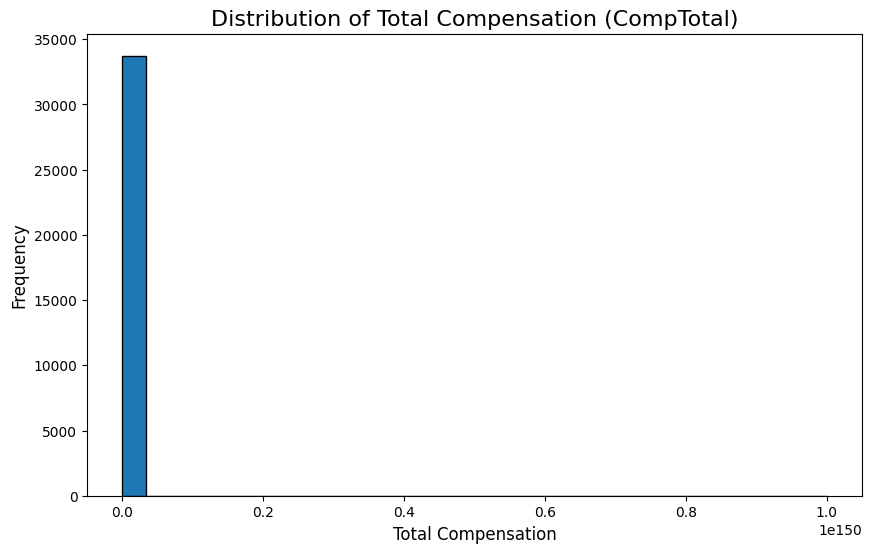

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'].dropna(), bins=30, edgecolor='black')

plt.title("Distribution of Total Compensation (CompTotal)", fontsize=16)
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


**Box Plots**

Plot a box plot of Age.


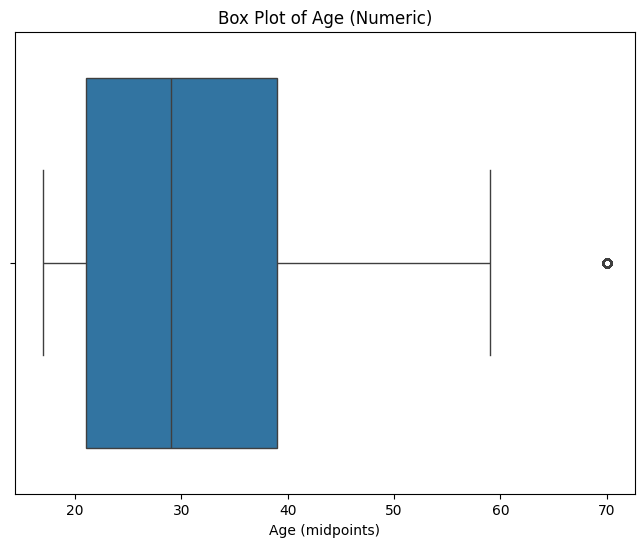

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example mapping (adjust if needed)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Replace categories with numeric midpoints
df['Age_numeric'] = df['Age'].map(age_mapping)

# Drop rows where mapping didn’t apply (like "Prefer not to say")
df_clean = df.dropna(subset=['Age_numeric'])

# Plot box plot
plt.figure(figsize=(8,6))
sns.boxplot(x=df_clean['Age_numeric'])
plt.title("Box Plot of Age (Numeric)")
plt.xlabel("Age (midpoints)")
plt.show()



### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


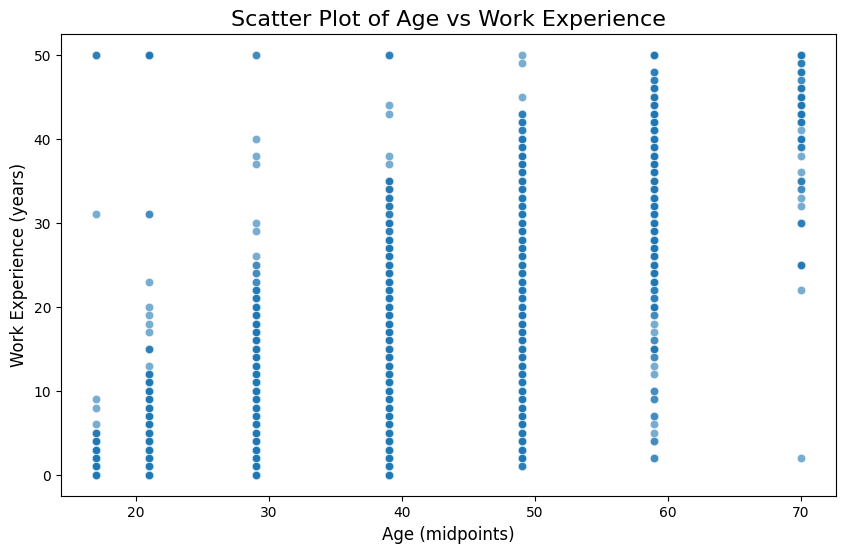

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Map Age categories to numeric midpoints
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# Create numeric Age column
df['Age_numeric'] = df['Age'].map(age_mapping)

# Keep only rows with valid Age and WorkExp
df_clean = df.dropna(subset=['Age_numeric', 'WorkExp'])

# Plot scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_numeric', y='WorkExp', data=df_clean, alpha=0.6)

plt.title("Scatter Plot of Age vs Work Experience", fontsize=16)
plt.xlabel("Age (midpoints)", fontsize=12)
plt.ylabel("Work Experience (years)", fontsize=12)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


Total rows: 65437
Rows with all three numeric fields present (before dropna): 28038
Rows used for plot: 28038


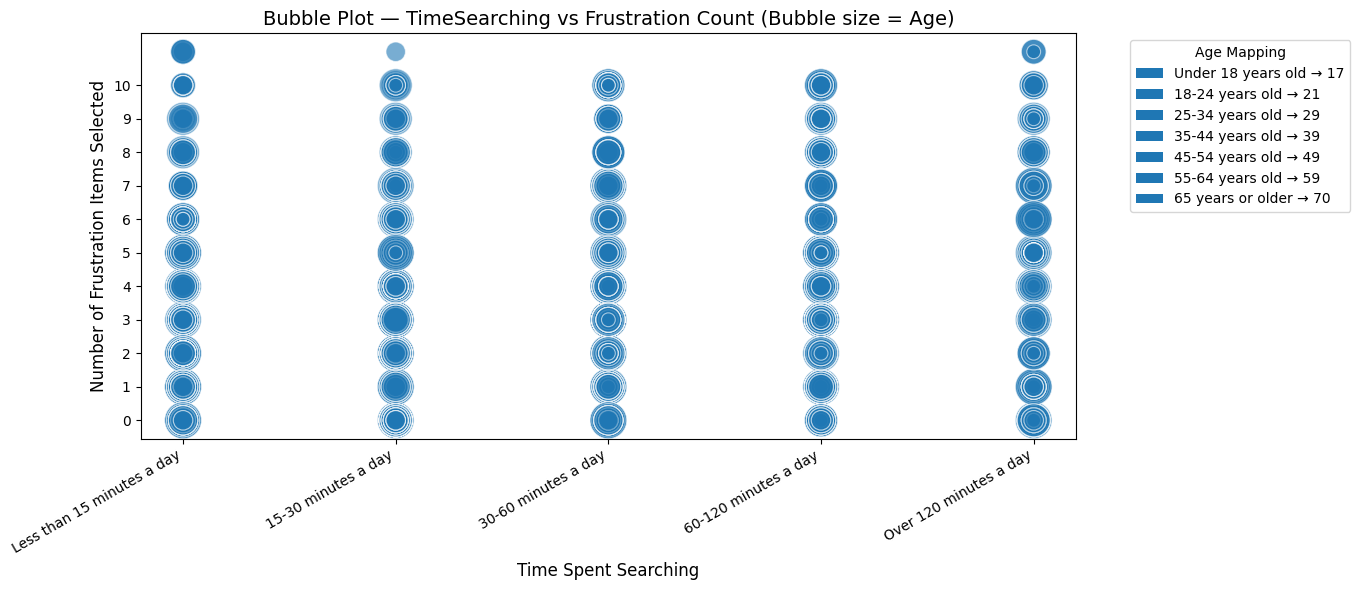

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


# --- Mappings (match your exact strings) ---
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}

age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}

# 1) map TimeSearching and Age
df['TimeSearching_num'] = df['TimeSearching'].map(time_mapping)
df['Age_numeric'] = df['Age'].map(age_mapping)

# treat 'Prefer not to say' as missing for age
df.loc[df['Age']=='Prefer not to say', 'Age_numeric'] = pd.NA

# 2) compute frustration count (number of selected items)
def frustration_count(val):
    if pd.isna(val):
        return pd.NA
    val = str(val).strip()
    if val == 'None of these':
        return 0
    if val == '':
        return pd.NA
    # split on ';' and count non-empty tokens
    parts = [p.strip() for p in val.split(';') if p.strip()!='']
    return len(parts)

df['Frustration_count'] = df['Frustration'].apply(frustration_count)

# Diagnostics
print("Total rows:", len(df))
usable_before = df[['TimeSearching_num','Frustration_count','Age_numeric']].notna().all(axis=1).sum()
print("Rows with all three numeric fields present (before dropna):", usable_before)

# keep only usable rows
df_clean = df.dropna(subset=['TimeSearching_num','Frustration_count','Age_numeric']).copy()
print("Rows used for plot:", len(df_clean))

if len(df_clean) == 0:
    print("No rows to plot — check mapping or data. The earlier printed unique values should help.")
else:
    # normalize age numeric to a reasonable bubble size range
    ages = df_clean['Age_numeric'].astype(float)
    # scale to [50, 700]
    min_size, max_size = 50, 700
    size_norm = ((ages - ages.min()) / (ages.max() - ages.min() + 1e-9))  # 0..1
    bubble_sizes = min_size + size_norm * (max_size - min_size)

    plt.figure(figsize=(11,6))
    ax = sns.scatterplot(
        x='TimeSearching_num',
        y='Frustration_count',
        size=bubble_sizes,    # pass already-scaled sizes
        sizes=(min_size, max_size),
        data=df_clean,
        alpha=0.6,
        legend=False  # optional: hide automatic legend to avoid clutter
    )

    # restore x-tick labels to the original descriptive strings (ordered)
    xtick_order = ['Less than 15 minutes a day', '15-30 minutes a day', '30-60 minutes a day',
                   '60-120 minutes a day', 'Over 120 minutes a day']
    x_ticks = [time_mapping[s] for s in xtick_order]
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(xtick_order, rotation=30, ha='right')

    # y tick: it's count (0,1,2,3,...). Set integer ticks up to reasonable max (cap at 10)
    max_count = int(min(10, df_clean['Frustration_count'].max()))
    ax.set_yticks(range(0, max_count+1))
    legend_handles = [
    mpatches.Patch(label=f"{age} → {val}") for age, val in age_mapping.items()
    ]
    plt.xlabel("Time Spent Searching", fontsize=12)
    plt.ylabel("Number of Frustration Items Selected", fontsize=12)
    plt.title("Bubble Plot — TimeSearching vs Frustration Count (Bubble size = Age)", fontsize=14)
    plt.tight_layout()
    plt.legend(handles=legend_handles, title="Age Mapping", 
           bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()




### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


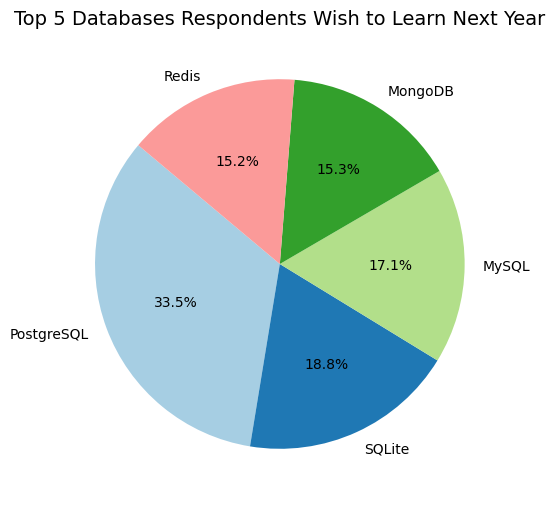

In [17]:
import matplotlib.pyplot as plt

# Split multiple databases into separate rows
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode()

# Count frequencies
db_counts = db_series.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    db_counts,
    labels=db_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title("Top 5 Databases Respondents Wish to Learn Next Year", fontsize=14)
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


In [18]:
df['TimeAnswering'].unique()

array([None, '60-120 minutes a day', '15-30 minutes a day',
       '30-60 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

Rows included (approx 30-35 via midpoints 29-39): 23911
Median (1-5 scale):
 TimeSearching_num    3.0
TimeAnswering_num    2.0
dtype: float64


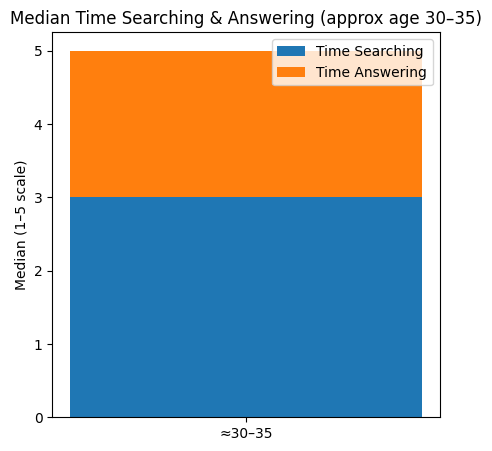

In [21]:
# ensure Age_numeric exists and is numeric
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    "Prefer not to say": pd.NA
}
df['Age_numeric'] = df['Age'].map(age_map)
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')

# ensure time mappings exist
time_mapping = {
    'Less than 15 minutes a day': 1,
    '15-30 minutes a day': 2,
    '30-60 minutes a day': 3,
    '60-120 minutes a day': 4,
    'Over 120 minutes a day': 5
}
df['TimeSearching_num'] = df['TimeSearching'].map(time_mapping)
df['TimeAnswering_num'] = df['TimeAnswering'].map(time_mapping)

# Widened numeric filter (approximate 30-35)
age_group_df = df[(df['Age_numeric'] >= 29) & (df['Age_numeric'] <= 39)].copy()
print("Rows included (approx 30-35 via midpoints 29-39):", len(age_group_df))

if len(age_group_df) == 0:
    print("No rows found — consider using category-based selection.")
else:
    median_values = age_group_df[['TimeSearching_num','TimeAnswering_num']].median()
    print("Median (1-5 scale):\n", median_values)

    # stacked bar plot
    plt.figure(figsize=(5,5))
    bottom = median_values['TimeSearching_num']
    plt.bar("≈30–35", median_values['TimeSearching_num'], label="Time Searching")
    plt.bar("≈30–35", median_values['TimeAnswering_num'], bottom=bottom, label="Time Answering")
    plt.ylabel("Median (1–5 scale)")
    plt.title("Median Time Searching & Answering (approx age 30–35)")
    plt.legend()
    plt.show()




### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


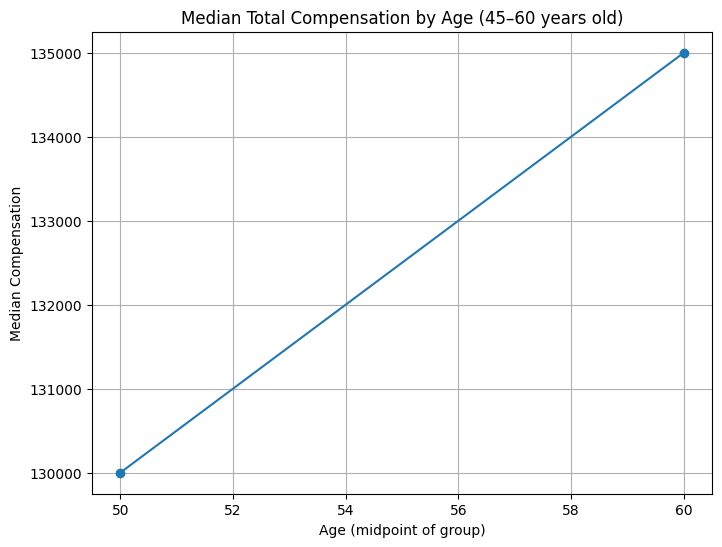

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Map age categories to numeric midpoints
age_map = {
    "Under 18 years old": 15,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70,
    "Prefer not to say": pd.NA
}

df['Age_numeric'] = df['Age'].map(age_map)
df['Age_numeric'] = pd.to_numeric(df['Age_numeric'], errors='coerce')

# Drop missing CompTotal rows
df = df.dropna(subset=['CompTotal'])

# Group by age midpoint, compute median CompTotal
median_comp = df.groupby('Age_numeric')['CompTotal'].median()

# Filter ages 45–60
median_comp_45_60 = median_comp[(median_comp.index >= 45) & (median_comp.index <= 60)]

# Plot line chart
plt.figure(figsize=(8,6))
plt.plot(median_comp_45_60.index, median_comp_45_60.values, marker='o', linestyle='-')
plt.title("Median Total Compensation by Age (45–60 years old)")
plt.xlabel("Age (midpoint of group)")
plt.ylabel("Median Compensation")
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


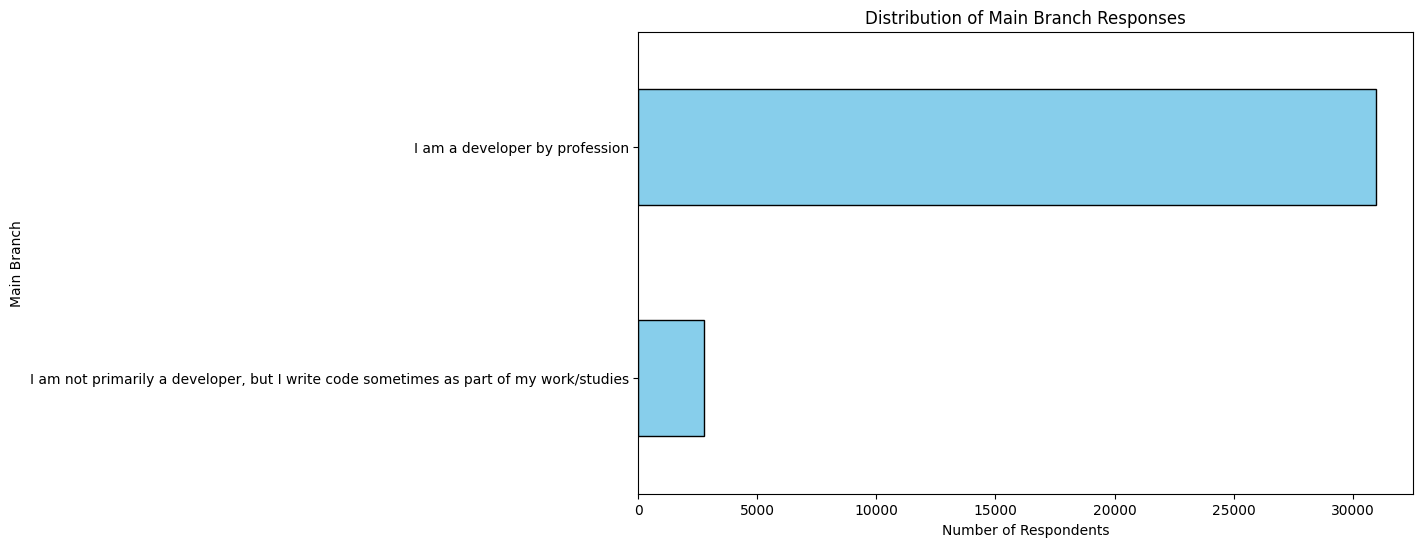

In [23]:
import matplotlib.pyplot as plt

# Count values of MainBranch
branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
branch_counts.plot(kind='barh', color='skyblue', edgecolor='black')

# Labels and title
plt.title("Distribution of Main Branch Responses")
plt.xlabel("Number of Respondents")
plt.ylabel("Main Branch")
plt.gca().invert_yaxis()  # Largest at the top
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
